# Checking your network

Selecting which rates to include and which to exclude from your network is a bit of an art.  pynucastro has a few tools to help check what you might be missing.

In [1]:
import pynucastro as pyna

In [2]:
reaclib_library = pyna.ReacLibLibrary()

## `RateCollection` validate method

Let's start by trying to create a network for carbon burning.

To start, let's pick the nuclei $\alpha$, ${}^{12}\mathrm{C}$ and ${}^{20}\mathrm{Ne}$

In [3]:
nuclei = ["he4", "c12", "ne20"]
cburn_library = reaclib_library.linking_nuclei(nuclei)

Now we can make a rate collection

In [4]:
rc = pyna.RateCollection(libraries=[cburn_library])
rc

C12 ⟶ He4 + He4 + He4
C12 + C12 ⟶ He4 + Ne20
Ne20 + He4 ⟶ C12 + C12
He4 + He4 + He4 ⟶ C12 + 𝛾

Now, since we are primarily interested in ${}^{12}\mathrm{C} + {}^{12}\mathrm{C}$, let's make sure we are not missing any other reactions that have the same reactants.  The `validate()` method will do this, by comparing the rates we have selected to another library.

In [5]:
rc.validate(reaclib_library)

validation: ne20 produced in C12 + C12 ⟶ He4 + Ne20 never consumed.
validation: missing He4 + He4 + He4 ⟶ p + B11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -8.682 MeV).
validation: missing He4 + He4 + He4 ⟶ n + C11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -11.4466 MeV).
validation: missing C12 + C12 ⟶ p + Na23 as alternative to C12 + C12 ⟶ He4 + Ne20 (Q = 2.242 MeV).
validation: missing C12 + C12 ⟶ n + Mg23 as alternative to C12 + C12 ⟶ He4 + Ne20 (Q = -2.598 MeV).


False

This tells us that we are missing 2 branches of the ${}^{12}\mathrm{C} + {}^{12}\mathrm{C}$ reaction.  ReacLib already scales the rates based on the branching of the products, so we should try to include these other branches.

Note: by default, `validate()` only checks forward rates.

To address these issues, we need to include the additional nuclei.  In particular, the branch that makes ${}^{23}\mathrm{Na}$ is likely important (the rate making ${}^{23}\mathrm{Mg}$ is endothermic, so less likely).

In [6]:
nuclei += ["p", "na23"]
cburn_library = reaclib_library.linking_nuclei(nuclei)
rc = pyna.RateCollection(libraries=[cburn_library])
rc

C12 ⟶ He4 + He4 + He4
C12 + C12 ⟶ p + Na23
C12 + C12 ⟶ He4 + Ne20
Ne20 + He4 ⟶ p + Na23
Ne20 + He4 ⟶ C12 + C12
Na23 + p ⟶ He4 + Ne20
Na23 + p ⟶ C12 + C12
He4 + He4 + He4 ⟶ C12 + 𝛾

In [7]:
rc.validate(reaclib_library)

validation: ne20 produced in C12 + C12 ⟶ He4 + Ne20 never consumed.
validation: ne20 produced in Na23 + p ⟶ He4 + Ne20 never consumed.
validation: missing He4 + He4 + He4 ⟶ p + B11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -8.682 MeV).
validation: missing He4 + He4 + He4 ⟶ n + C11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -11.4466 MeV).
validation: missing C12 + C12 ⟶ n + Mg23 as alternative to C12 + C12 ⟶ He4 + Ne20 (Q = -2.598 MeV).
validation: missing C12 + C12 ⟶ n + Mg23 as alternative to C12 + C12 ⟶ p + Na23 (Q = -2.598 MeV).
validation: missing Na23 + p ⟶ n + Mg23 as alternative to Na23 + p ⟶ He4 + Ne20 (Q = -4.839 MeV).
validation: missing Na23 + p ⟶ Mg24 + 𝛾 as alternative to Na23 + p ⟶ He4 + Ne20 (Q = 11.6927 MeV).


False

Now, looking at what is missing, we probably want to include ${}^{24}\mathrm{Mg}$ as an endpoint for carbon burning.

In [8]:
nuclei += ["mg24"]
cburn_library = reaclib_library.linking_nuclei(nuclei)
rc = pyna.RateCollection(libraries=[cburn_library])
rc

Mg24 ⟶ p + Na23
Mg24 ⟶ He4 + Ne20
C12 ⟶ He4 + He4 + He4
Ne20 + He4 ⟶ Mg24 + 𝛾
Na23 + p ⟶ Mg24 + 𝛾
C12 + C12 ⟶ p + Na23
C12 + C12 ⟶ He4 + Ne20
Ne20 + He4 ⟶ p + Na23
Ne20 + He4 ⟶ C12 + C12
Na23 + p ⟶ He4 + Ne20
Na23 + p ⟶ C12 + C12
He4 + He4 + He4 ⟶ C12 + 𝛾

In [9]:
rc.validate(reaclib_library)

validation: mg24 produced in Ne20 + He4 ⟶ Mg24 + 𝛾 never consumed.
validation: mg24 produced in Na23 + p ⟶ Mg24 + 𝛾 never consumed.
validation: missing He4 + He4 + He4 ⟶ p + B11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -8.682 MeV).
validation: missing He4 + He4 + He4 ⟶ n + C11 as alternative to He4 + He4 + He4 ⟶ C12 + 𝛾 (Q = -11.4466 MeV).
validation: missing C12 + C12 ⟶ n + Mg23 as alternative to C12 + C12 ⟶ He4 + Ne20 (Q = -2.598 MeV).
validation: missing C12 + C12 ⟶ n + Mg23 as alternative to C12 + C12 ⟶ p + Na23 (Q = -2.598 MeV).
validation: missing Ne20 + He4 ⟶ n + Mg23 as alternative to Ne20 + He4 ⟶ Mg24 + 𝛾 (Q = -7.21457 MeV).
validation: missing Na23 + p ⟶ n + Mg23 as alternative to Na23 + p ⟶ He4 + Ne20 (Q = -4.839 MeV).
validation: missing Na23 + p ⟶ n + Mg23 as alternative to Na23 + p ⟶ Mg24 + 𝛾 (Q = -4.839 MeV).


False

This now seems reasonable.  The reactions that are missing are all endothermic.

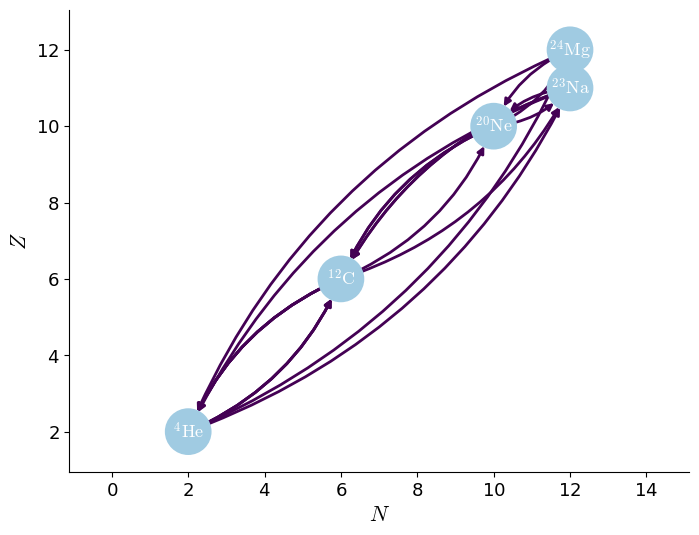

In [10]:
fig = rc.plot(curved_edges=True)

## Finding duplicate links in a `RateCollection`

Sometimes we combine multiple sources of rates into a `RateCollection` or network, and we run the risk of
having the same rate sequence duplicated, even though the rate itself may be different (i.e., a different
source or tabulated vs. ReacLib).

Here we see how to check a `RateCollection` for duplicates.

We'll start by recreating the electron-capture supernova network explored earlier.

First we get rates from ReacLib

In [11]:
all_nuclei = ["p", "he4",
              "ne20", "o20", "f20",
              "mg24", "al27", "o16",
              "si28", "s32", "p31"]
ecsn_library = reaclib_library.linking_nuclei(all_nuclei,with_reverse=True)

Next we get some tabulated rates

In [12]:
tabular_lib = pyna.TabularLibrary()
ecsn_tabular = tabular_lib.linking_nuclei(["f20", "o20", "ne20"])

Now we build a `RateCollection` using these two libraries

In [13]:
rc = pyna.RateCollection(libraries=[ecsn_library, ecsn_tabular])

If we print out the rates, we see that there are duplicates involving beta decays

In [14]:
rc.get_rates()

[O20 ⟶ F20 + e⁻ + 𝜈,
 F20 ⟶ Ne20 + e⁻ + 𝜈,
 Ne20 ⟶ He4 + O16,
 Mg24 ⟶ He4 + Ne20,
 Si28 ⟶ p + Al27,
 Si28 ⟶ He4 + Mg24,
 P31 ⟶ He4 + Al27,
 S32 ⟶ p + P31,
 S32 ⟶ He4 + Si28,
 O16 + He4 ⟶ Ne20 + 𝛾,
 Ne20 + He4 ⟶ Mg24 + 𝛾,
 Mg24 + He4 ⟶ Si28 + 𝛾,
 Al27 + p ⟶ Si28 + 𝛾,
 Al27 + He4 ⟶ P31 + 𝛾,
 Si28 + He4 ⟶ S32 + 𝛾,
 P31 + p ⟶ S32 + 𝛾,
 O16 + O16 ⟶ p + P31,
 O16 + O16 ⟶ He4 + Si28,
 Mg24 + He4 ⟶ p + Al27,
 Al27 + p ⟶ He4 + Mg24,
 Si28 + He4 ⟶ p + P31,
 Si28 + He4 ⟶ O16 + O16,
 P31 + p ⟶ He4 + Si28,
 P31 + p ⟶ O16 + O16,
 F20 ⟶ Ne20 + e⁻ + 𝜈,
 F20 + e⁻ ⟶ O20 + 𝜈,
 Ne20 + e⁻ ⟶ F20 + 𝜈,
 O20 ⟶ F20 + e⁻ + 𝜈]

The `find_duplicate_links()` method will find these

In [15]:
dupes = rc.find_duplicate_links()
dupes

[[O20 ⟶ F20 + e⁻ + 𝜈, O20 ⟶ F20 + e⁻ + 𝜈],
 [F20 ⟶ Ne20 + e⁻ + 𝜈, F20 ⟶ Ne20 + e⁻ + 𝜈]]

Here we see 2 pairs of duplicates.  Looking at the first

In [16]:
for rate in dupes[0]:
    print(f"{rate.fname:20} {type(rate)}")

o20__f20__weak__wc12 <class 'pynucastro.rates.rate.ReacLibRate'>
o20__f20             <class 'pynucastro.rates.rate.TabularRate'>


We see that one is a `ReacLibRate` and the other is a `TabularRate`.
In general, the `TabularRate` is preferred, since it has a density and temperature dependence
and works at high densities.

We can use this information to remove the undesired rate from the `RateCollection` using the
`remove_rates()` method.

In [17]:
from pynucastro.rates import ReacLibRate
rates_to_remove = []
for d in dupes:
    rates_to_remove += [r for r in d if isinstance(r, ReacLibRate)]

In [18]:
rc.remove_rates(rates_to_remove)

Now we see only a single instance of these links

In [19]:
rc.get_rates()

[Ne20 ⟶ He4 + O16,
 Mg24 ⟶ He4 + Ne20,
 Si28 ⟶ p + Al27,
 Si28 ⟶ He4 + Mg24,
 P31 ⟶ He4 + Al27,
 S32 ⟶ p + P31,
 S32 ⟶ He4 + Si28,
 O16 + He4 ⟶ Ne20 + 𝛾,
 Ne20 + He4 ⟶ Mg24 + 𝛾,
 Mg24 + He4 ⟶ Si28 + 𝛾,
 Al27 + p ⟶ Si28 + 𝛾,
 Al27 + He4 ⟶ P31 + 𝛾,
 Si28 + He4 ⟶ S32 + 𝛾,
 P31 + p ⟶ S32 + 𝛾,
 O16 + O16 ⟶ p + P31,
 O16 + O16 ⟶ He4 + Si28,
 Mg24 + He4 ⟶ p + Al27,
 Al27 + p ⟶ He4 + Mg24,
 Si28 + He4 ⟶ p + P31,
 Si28 + He4 ⟶ O16 + O16,
 P31 + p ⟶ He4 + Si28,
 P31 + p ⟶ O16 + O16,
 F20 ⟶ Ne20 + e⁻ + 𝜈,
 F20 + e⁻ ⟶ O20 + 𝜈,
 Ne20 + e⁻ ⟶ F20 + 𝜈,
 O20 ⟶ F20 + e⁻ + 𝜈]